<a href="https://colab.research.google.com/github/M4T30-772/Implementacija-modela-za-klasifikaciju-vrste-instrumenta-kori-tenjem-konvolucijskih-neuronskih-mre-a/blob/main/Testovi_i_probe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [8]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Instrument/Train'
valid_path = '/content/drive/MyDrive/Instrument/Test'
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
for layer in inception.layers:
    layer.trainable = True

In [10]:
folders = glob('/content/drive/MyDrive/Instrument/Train/*')
folders

['/content/drive/MyDrive/Instrument/Train/Banjo_train',
 '/content/drive/MyDrive/Instrument/Train/Bubnjevi_train',
 '/content/drive/MyDrive/Instrument/Train/Gitara_train',
 '/content/drive/MyDrive/Instrument/Train/Saksofon_train',
 '/content/drive/MyDrive/Instrument/Train/Klavir_train',
 '/content/drive/MyDrive/Instrument/Train/Truba_train',
 '/content/drive/MyDrive/Instrument/Train/Flauta_train',
 '/content/drive/MyDrive/Instrument/Train/Violina_train',
 '/content/drive/MyDrive/Instrument/Train/Harmonika_train',
 '/content/drive/MyDrive/Instrument/Train/Harfa_train']

In [11]:
x = GlobalAveragePooling2D()(inception.output)

In [12]:
x = Dropout(0.6)(x)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

In [14]:
model = Model(inputs=inception.input, outputs=prediction)

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Instrument/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 3539 images belonging to 10 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Instrument/Test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 996 images belonging to 10 classes.


In [19]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-19-f791870df9d1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/3
  4/222 [..............................] - ETA: 30:33 - loss: 2.4105 - accuracy: 0.1562

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


222/222 [==============================] - 2352s 10s/step - loss: 1.4865 - accuracy: 0.5284 - val_loss: 240.3517 - val_accuracy: 0.1004
Epoch 2/3
222/222 [==============================] - 2033s 9s/step - loss: 1.1657 - accuracy: 0.6378 - val_loss: 1.4802 - val_accuracy: 0.6285
Epoch 3/3
222/222 [==============================] - 2020s 9s/step - loss: 1.0470 - accuracy: 0.6807 - val_loss: 2.5929 - val_accuracy: 0.5050


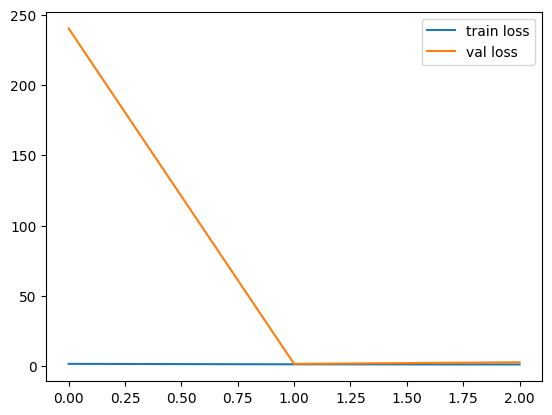

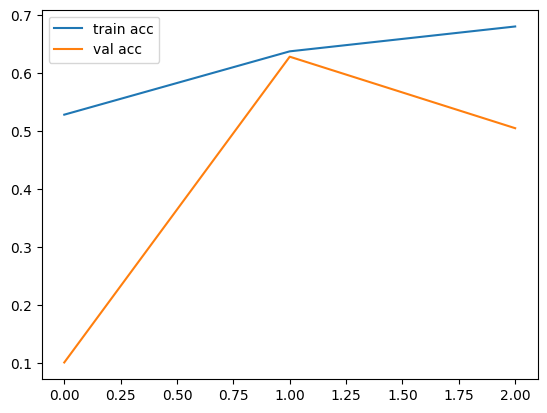

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')